# Feature Extraction Workshop

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Q1 Use Pandas to read in ‘wine.csv’
df = pd.read_csv('../Data_Sets/wine.csv')

In [6]:
df.head()

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
#Q2 Select all the columns, except the first column (Cultivar), to perform PCA on. 
#‘Cultivar’, in this dataset, is a label (or a class), 
#hence we do not use it when computing our principal components.
#--performing standardization on dataset--
from sklearn.preprocessing import StandardScaler
y = df.loc[:,'Cultivar'].values
x = df.iloc[:,1:]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x) 

In [11]:
#Q3 applying pca on our features
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pc = pca.fit_transform(x)
print(pc)

[[ 3.18562979e+02  2.14921307e+01  3.13073470e+00 -2.50113758e-01
   6.77078222e-01  5.68081040e-01]
 [ 3.03097420e+02 -5.36471768e+00  6.82283550e+00 -8.64034749e-01
  -4.86095978e-01  1.43398712e-02]
 [ 4.38061133e+02 -6.53730945e+00 -1.11322298e+00  9.12410681e-01
   3.80651426e-01  6.72403748e-01]
 ...
 [ 8.84580737e+01  1.87762846e+01 -2.23757651e+00 -4.82070817e+00
  -1.05733568e+00  2.15000027e-01]
 [ 9.34562419e+01  1.86708191e+01 -1.78839152e+00 -3.70935193e+00
  -2.76956208e-01 -1.00922935e+00]
 [-1.86943190e+02 -2.13330803e-01 -5.63050984e+00 -3.47298694e+00
   7.03463092e-03  7.03635720e-01]]


In [14]:
#Q4 Print out the proportion of Explained Variance that each principal component contributes. 
#Then sum up the ratios and print out Explained Variance for your n_components of choice. 
#You can use the member variable explained_variance_ratio_ 
#from the pca object to print out the ratios.
print('Explained Variance ratio is: ', pca.explained_variance_ratio_)
print('Explained Variance for ', str(pca.n_components) + ' principal components: ', pca.explained_variance_ratio_.sum())

Explained Variance ratio is:  [9.98091230e-01 1.73591562e-03 9.49589576e-05 5.02173562e-05
 1.23636847e-05 8.46213034e-06]
Explained Variance for  6 principal components:  0.99999314824536


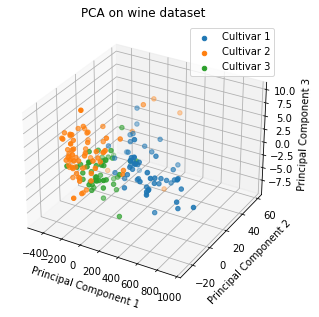

In [16]:
#Q5 Using Matplotlib, plot a 3D graph with the values from Principal Components 1, 2 and 3; 
#denoting each sample (i.e. each row) with a color that represents one of the cultivars 
#(i.e. column ‘Cultivar’ of our dataset). Label your graph’s axes and display the legend. 
#Finally, title your graph as “PCA on wine dataset”. 
import numpy as np
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')

for i in np.unique(y):
    pc_by_cultivar = pc[y==i]
    ax.scatter3D(xs=pc_by_cultivar[:,0],
                ys=pc_by_cultivar[:,1],
                zs=pc_by_cultivar[:,2],
                label='Cultivar ' + str(i))
    
plt.title('PCA on wine dataset')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.legend()
plt.show()